In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pathlib
from mpl_toolkits.mplot3d import Axes3D
from copy import copy
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pandas as pd

p = pathlib.PurePath(os.getcwd())
BASE_DIR = str(p.parent)
dataPath = pathlib.Path(BASE_DIR + '/data/population_ratios')
pop_names = ['JFC', 'HTC', 'AST', 'OCC']

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def get_logp_grid(filename = 'grid_logp_OLD.txt', dataDir = '/data/population_ratios'):
    path_to_file = BASE_DIR + dataDir + '/' + filename
    
    try:
        # Old files will not have headers and will throw an error
        data = np.loadtxt(path_to_file)
    except:
        df = pd.read_csv(path_to_file, header = 'infer', delim_whitespace = True)
    else:
        try:
            names = ['logp', 'JFC', 'HTC', 'AST', 'OCC']
            df = pd.DataFrame(data = data, columns = names) 
        except:
            names = ['logp', 'JFC', 'HTC', 'OCC']
            df = pd.DataFrame(data = data, columns = names)   
    
    return df

    
    
def plotMarginalProb(theta_p_list, logp, 
        pop_names = ['JFC', 'HTC', 'AST', 'OCC'], ax = None, 
        multiple = False):

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.axis('equal')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xlabel(pop_names[1])
    ax.set_ylabel(pop_names[2])
    ax.set_zlabel(pop_names[3])
    
    ax.view_init(15, -35)
        
    # Set normalization for colorbar
    cmap = copy(plt.cm.viridis)
    
    norm = mpl.colors.Normalize(vmin = min(logp), 
                                vmax = max(logp))
    norm_levels = mpl.colors.Normalize(vmin = 0, vmax = 1)
    
    cut_cm = plt.cm.plasma
    cuts = np.sort(list(set(theta_p_list[:, 0])))
    for i, cut in enumerate(cuts):
        label = '%s = %1.2f'%(pop_names[0], cut)
        if multiple:
            fig = plt.figure(figsize = (10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.axis('equal')
            ax.view_init(15, -35)
            ax.set_ylim(0, 1)
            ax.set_xlim(0, 1)
            ax.set_zlim(0, 1)
            ax.set_xlabel(pop_names[1])
            ax.set_ylabel(pop_names[2])
            ax.set_zlabel(pop_names[3])
            
        
        if cut != 1:
            x = [1 - cut, 0, 0, 1 - cut]
            y = [0, 1 - cut, 0, 0]
            z = [0, 0, 1 - cut, 0]
            verts = [list(zip(x, y, z))]
            alpha = 0.5
            ax.plot(x, y, z, c = cut_cm(cut), alpha = 0.5)
        
        
        # Plot only plots on that level
        Cs = theta_p_list[theta_p_list[:, 0] == cut]
        log_p_cut = logp[theta_p_list[:, 0] == cut]
        pcm = ax.scatter(Cs[:, 1], Cs[:, 2], Cs[:, 3], 
                     c = log_p_cut, 
                     cmap = cmap, norm = norm,
                     label = None)
        ax.scatter([0], [0], [1 - cut], c = [cut], 
               cmap = cut_cm, norm = norm_levels,
               label = label, alpha = 1)
        
        # Colorbar / legend
        if cut == 0 or multiple:
            fig.colorbar(pcm, ax = ax, extend = 'max')   
        if multiple:
            ax.legend()
    ax.legend()

    return fig

#'grid_smart_logp.txt')#'grid_logp_OLD.txt'
df = get_logp_grid(filename = 'grid_normed.txt')

#plotMarginalProb(theta_p_list, logp, pop_names = ['JFC', 'HTC', 'AST', 'OCC']) # 'AST', 'OCC'])


In [3]:
def get_index(pop_type):
    if pop_type == 'JFC':
        return 0
    if pop_type == 'HTC':
        return 1
    if pop_type == 'OCC':
        return 2
    
def plotGrid(df, order = ['JFC', 'HTC', 'OCC']):
    
    fig, ax = plt.subplots(figsize = (10,10))
    x = df[order[0]].values #theta_p_list[:, get_index(order[0])] # JFC
    y = df[order[1]].values #theta_p_list[:, get_index(order[1])] # HTC
    z = df[order[2]].values
    logp = df['logp'].values
    #z = theta_p_list[:, get_index(order[2])]
    cax = ax.scatter(x + y, np.divide(x, x + y), c = logp)
    
    ax.set_xlabel('%s + %s / 1'%(order[0], order[1]))
    ax.set_ylabel('%s / (%s + %s)'%(order[0], order[0], order[1]))
    
    fig.colorbar(cax)
    #return fig
    

    
def plot3d(df, order = ['JFC', 'HTC', 'Uniform']):
    x = df[order[0]].values 
    y = df[order[1]].values
    z = df[order[2]].values
    logp = df['logp'].values
    
    fig = plt.figure(figsize = (10,10))    
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c = logp)
    ax.view_init(15, -35)
    ax.set_xlabel(order[0])
    ax.set_ylabel(order[1])
    ax.set_zlabel(order[2])


    max_p = np.argmax(logp)

def imshowGrid(df, order):
    from scipy import interpolate
    
    fig, ax = plt.subplots(figsize = (10,10))
    x = df[order[0]].values #theta_p_list[:, get_index(order[0])] # JFC
    y = df[order[1]].values #theta_p_list[:, get_index(order[1])] # HTC
    z = df[order[2]].values
    logp = df['logp'].values
    
    X = x + y
    Y = np.divide(x, x + y)

    dropNA = [np.logical_not(np.isnan(Y))]
    
    logp = logp[dropNA]
    X = X[dropNA]
    Y = Y[dropNA]
    
    ax.scatter(X, Y, c = logp)
    cax = ax.tricontourf(X, Y, logp, 20)
    
    ax.set_xlabel('(%s + %s) / 1'%(order[0], order[1]))
    ax.set_ylabel('%s / (%s + %s)'%(order[0], order[0], order[1]))
    
    fig.colorbar(cax)

    #return fig
    





/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:59: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an 

        logp       JFC       HTC       OCC
39 -969.0804  0.358247  0.612554  0.029198


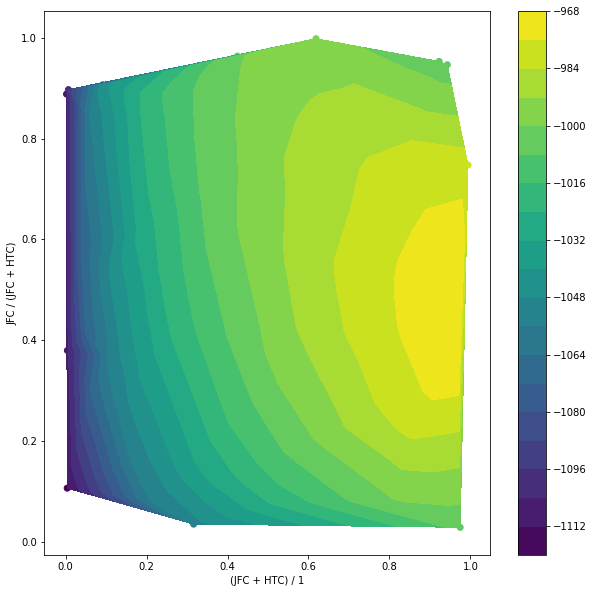

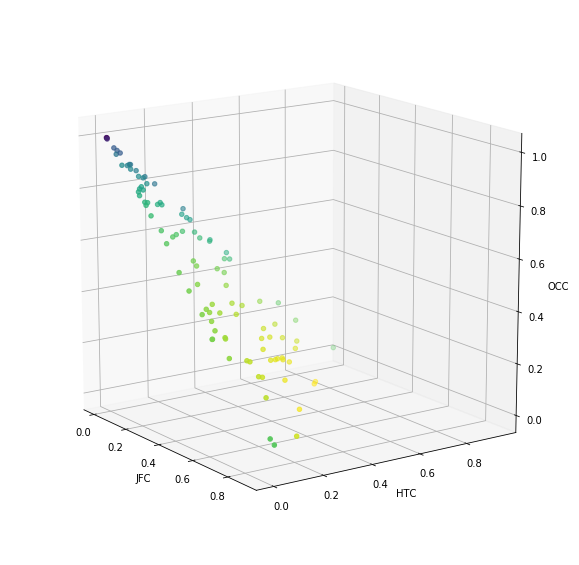

In [5]:

# JFC HTC OCC
"""
df = get_logp_grid(filename = 'only_impacts.txt')#'grid_normed_0802.txt')
order = ['JFC', 'HTC', 'OCC']
imshowGrid(df, order = order)
print('Maximum :', df[df['logp'] == max(df['logp'])])
plot3d(df, order = order)
"""
order = ['JFC', 'HTC', 'OCC']
df = get_logp_grid(filename = 'grid_normed_0802.txt')
imshowGrid(df, order = order)
plot3d(df, order = order)
print(df[df['logp'] == max(df['logp'])])





['JFC', 'HTC', 'Uniform']
['JFC' 'HTC' 'Uniform']
['JFC' 'HTC' 'Uniform']
['Uniform' 'JFC' 'HTC']
['Uniform' 'JFC' 'HTC']


/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:59: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/ipykernel_launcher.py:61: FutureWarning: Using a non-

Maximum :        logp  JFC       HTC   Uniform
4 -867.5588  0.0  0.444444  0.555556


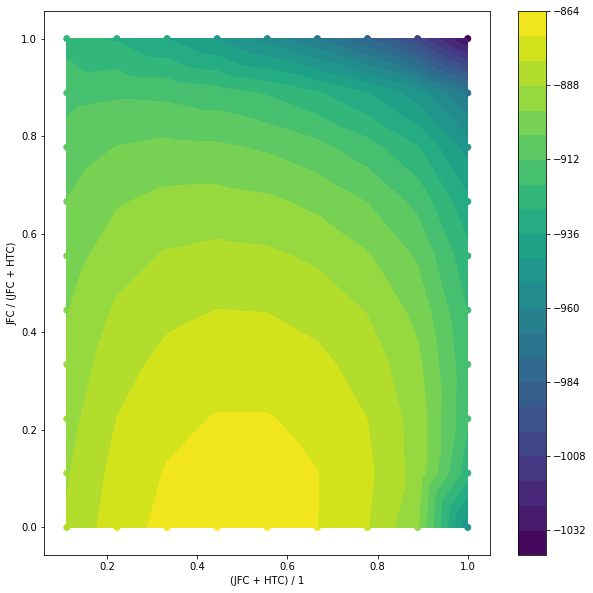

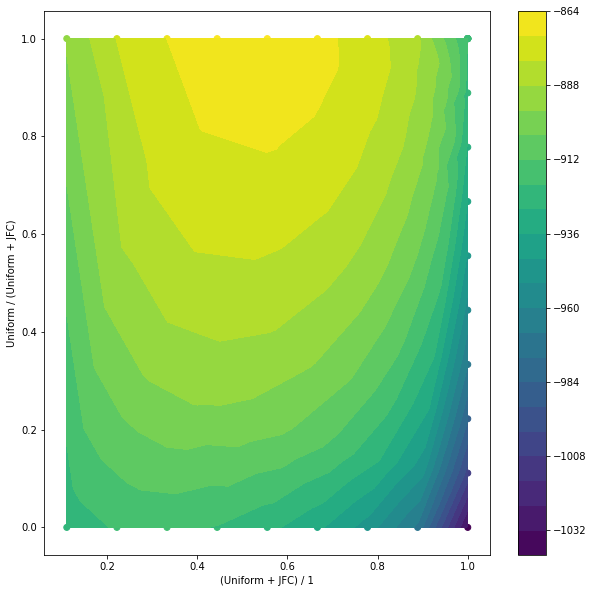

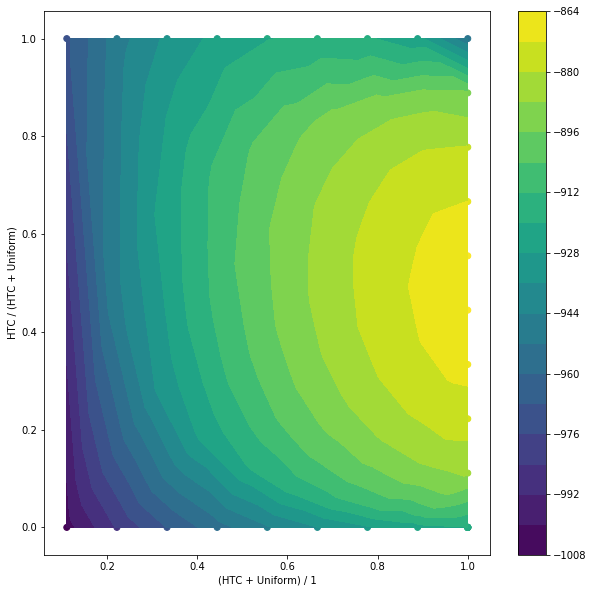

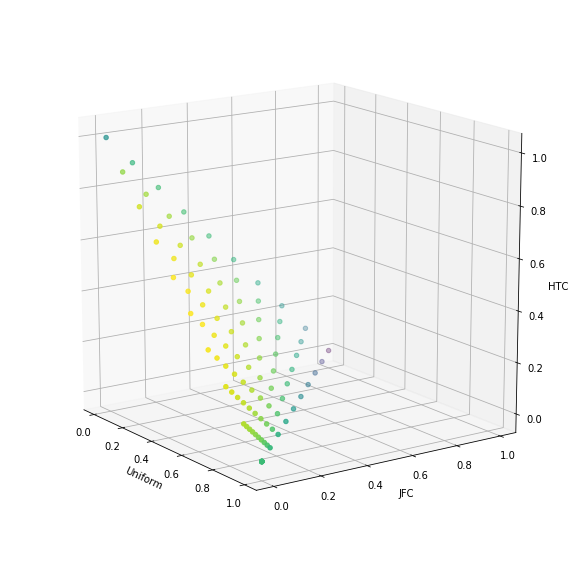

In [6]:

# JFC HTC Uniform

df = get_logp_grid(filename = 'grid_JFC_HTC_Uniform_0806.txt')
order = ['JFC', 'HTC', 'Uniform']
for i in range(len(order) - 1):
    print(order)
    order = np.roll(order, i)
    print(order)

    imshowGrid(df, order = order)
    
imshowGrid(df, order = ['HTC', 'Uniform', 'JFC'])
print(order)
plot3d(df, order = order)
print('Maximum :', df[df['logp'] == max(df['logp'])])
